# 04 - THE BEST ESTIMATOR_V2

## MODELAR ALGORITMO DE CLASIFICACIÓN 

Vamos a parametrizar el algoritmo con mejor auc del entrenamiento y evaluación con modelos base.

AdaClassifier()

## IMPORTACIÓN DE PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Crear datasets de entrenamiento y validación
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

#Optimizar modelo
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
import scikitplot as skplt

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle



## IMPORTACIÓN DE DATOS

## CARGAR LOS DATOS

In [2]:
df_tablon = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df_tablon.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,0


## SEPARAR PREDICTORAS Y TARGET

In [3]:
x = df_tablon.drop(columns= 'produccion').copy()
y = df_tablon.produccion.copy()

## MODELIZAR

### RESERVAR LOS DATASET DE ENTRENAMIENTO Y VALIDACIÓN

In [4]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state = 42)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES 

In [5]:
b_estimator = LogisticRegression(random_state=1 ,class_weight="balanced")


pipe = Pipeline([('algoritmo', AdaBoostClassifier())])

grid =  [
            {   'algoritmo' : [AdaBoostClassifier()],
                'algoritmo__base_estimator' : [b_estimator],
                'algoritmo__n_estimators': [50, 100, 200, 300],       # Número de estimadores (número de árboles débiles)
                'algoritmo__learning_rate': [0.01, 0.1, 1.0, 2.0],   # Tasa de aprendizaje (peso de cada árbol en el ensamble)
                'algoritmo__algorithm': ['SAMME', 'SAMME.R'],     # Algoritmo utilizado (SAMME o SAMME.R)
                'algoritmo__base_estimator__C': [0.01, 0.1, 1.0]
            }
        ]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [6]:
grid_search = GridSearchCV( estimator= pipe,
                           param_grid= grid,
                           cv = 5,
                           scoring= 'roc_auc',
                           verbose=0,
                           n_jobs= -1
                        )

modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__algorithm,param_algoritmo__base_estimator,param_algoritmo__base_estimator__C,param_algoritmo__learning_rate,param_algoritmo__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
95,2.778895,0.244768,0.123909,0.017201,AdaBoostClassifier(base_estimator=LogisticRegr...,SAMME.R,"LogisticRegression(class_weight='balanced', ra...",1.0,2.0,300,{'algoritmo': AdaBoostClassifier(base_estimato...,0.777778,0.444444,0.888889,0.8125,0.0000,0.584722,0.329621,1
93,1.259121,0.116310,0.067407,0.016628,AdaBoostClassifier(base_estimator=LogisticRegr...,SAMME.R,"LogisticRegression(class_weight='balanced', ra...",1.0,2.0,100,{'algoritmo': AdaBoostClassifier(base_estimato...,0.888889,0.444444,0.777778,0.6250,0.0000,0.547222,0.311755,2
90,2.004140,0.075447,0.117490,0.009926,AdaBoostClassifier(base_estimator=LogisticRegr...,SAMME.R,"LogisticRegression(class_weight='balanced', ra...",1.0,1.0,200,{'algoritmo': AdaBoostClassifier(base_estimato...,0.888889,0.444444,0.777778,0.6250,0.0000,0.547222,0.311755,2
94,2.323587,0.266636,0.122056,0.011561,AdaBoostClassifier(base_estimator=LogisticRegr...,SAMME.R,"LogisticRegression(class_weight='balanced', ra...",1.0,2.0,200,{'algoritmo': AdaBoostClassifier(base_estimato...,0.777778,0.444444,0.777778,0.6875,0.0000,0.537500,0.295138,4
91,3.215461,0.206638,0.189759,0.017354,AdaBoostClassifier(base_estimator=LogisticRegr...,SAMME.R,"LogisticRegression(class_weight='balanced', ra...",1.0,1.0,300,{'algoritmo': AdaBoostClassifier(base_estimato...,0.777778,0.444444,0.777778,0.6250,0.0000,0.525000,0.289796,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,2.627707,1.291814,0.080848,0.039477,AdaBoostClassifier(base_estimator=LogisticRegr...,SAMME,"LogisticRegression(class_weight='balanced', ra...",0.1,2.0,300,{'algoritmo': AdaBoostClassifier(base_estimato...,0.388889,0.277778,0.222222,0.3125,0.1875,0.277778,0.070410,83
26,0.027321,0.008426,0.011236,0.008153,AdaBoostClassifier(base_estimator=LogisticRegr...,SAMME,"LogisticRegression(class_weight='balanced', ra...",0.1,1.0,200,{'algoritmo': AdaBoostClassifier(base_estimato...,0.388889,0.277778,0.222222,0.3125,0.1875,0.277778,0.070410,83
29,0.930358,0.463201,0.036338,0.024391,AdaBoostClassifier(base_estimator=LogisticRegr...,SAMME,"LogisticRegression(class_weight='balanced', ra...",0.1,2.0,100,{'algoritmo': AdaBoostClassifier(base_estimato...,0.388889,0.277778,0.222222,0.3125,0.1875,0.277778,0.070410,83
33,0.944708,0.023970,0.033700,0.011944,AdaBoostClassifier(base_estimator=LogisticRegr...,SAMME,"LogisticRegression(class_weight='balanced', ra...",1.0,0.01,100,{'algoritmo': AdaBoostClassifier(base_estimato...,0.333333,0.277778,0.166667,0.3125,0.2500,0.268056,0.058201,95


In [7]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                                      random_state=1),
                                    learning_rate=2.0, n_estimators=300))])

In [8]:
modelo.best_params_

{'algoritmo': AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                      random_state=1),
                    learning_rate=2.0, n_estimators=300),
 'algoritmo__algorithm': 'SAMME.R',
 'algoritmo__base_estimator': LogisticRegression(class_weight='balanced', random_state=1),
 'algoritmo__base_estimator__C': 1.0,
 'algoritmo__learning_rate': 2.0,
 'algoritmo__n_estimators': 300}

In [9]:
modelo.best_score_

0.5847222222222223

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [10]:
modelo_best_estimator = modelo

#### Guardar modelo, parámetros y score

In [11]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PREDECIR Y EVALUAR SOBRE EL TRAIN

### Predecir sobre el Train

In [12]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [13]:
t_roc_auc = roc_auc_score(train_y, pred)
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Roc AUC: {t_roc_auc}")
print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Roc AUC: 0.8468992248062016
Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.45      0.83      0.59         6

    accuracy                           0.86        49
   macro avg       0.71      0.85      0.75        49
weighted avg       0.91      0.86      0.87        49



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

### Predecir sobre la validación

In [14]:
pred = modelo.best_estimator_.predict(val_x)
pred_proba = modelo.best_estimator_.predict_proba(val_x)[:,1]

### Evaluar sobre la validación

In [15]:
v_roc_auc_proba = roc_auc_score(val_y, pred_proba)
v_roc_auc = roc_auc_score(val_y, pred)
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:{v_report}")

Roc AUC_proba: 0.5
Roc AUC: 0.3055555555555556
Accuracy: 0.5238095238095238
Classification Report:              precision    recall  f1-score   support

           0       0.79      0.61      0.69        18
           1       0.00      0.00      0.00         3

    accuracy                           0.52        21
   macro avg       0.39      0.31      0.34        21
weighted avg       0.67      0.52      0.59        21



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

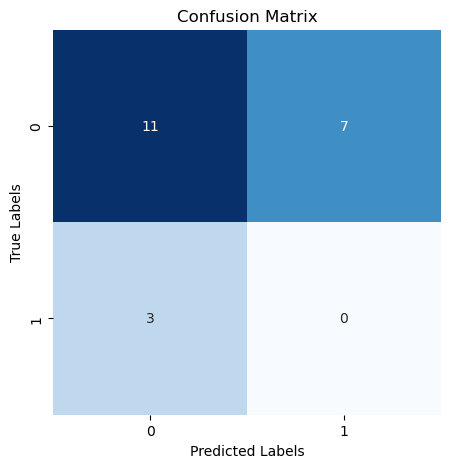

In [16]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Gain Chart

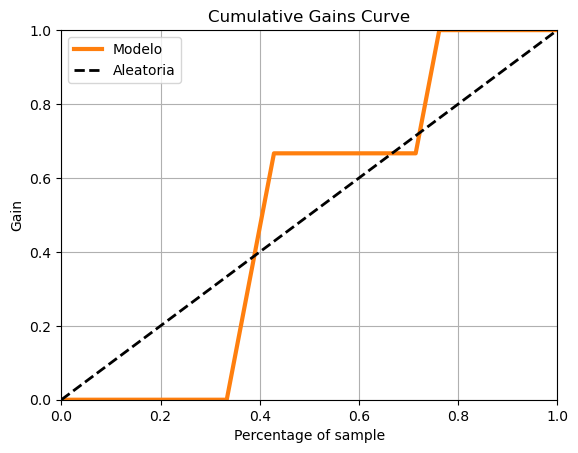

In [17]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()               
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

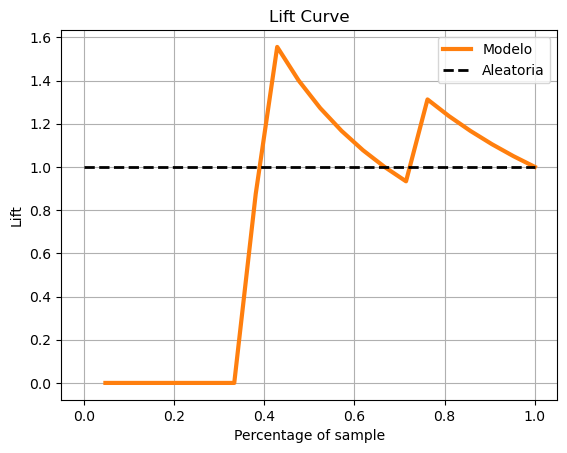

In [18]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()                
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

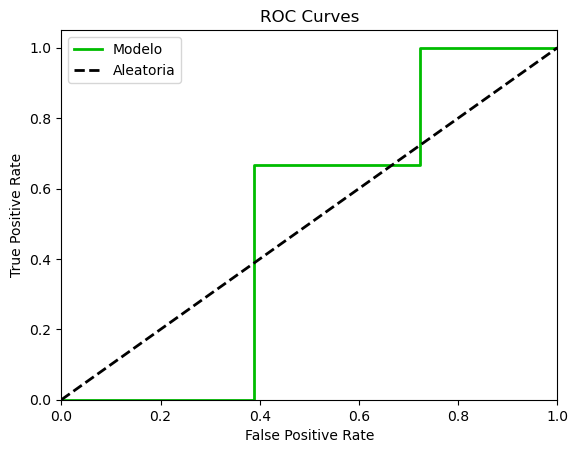

In [19]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()            
ax.lines[1].remove()
ax.lines[1].remove()
plt.legend(labels = ['Modelo','Aleatoria']);

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [20]:
version_estimator = '_v02_2'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'AdaBoostClassifier_v02_1.pickle'

In [21]:
m_best_estimator

'AdaBoostClassifier'

In [22]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [23]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Modelo Base con parámetros para evitar el sobreajuste  y añadimos base_estimator con balanceo y regularización."
x_columns = list(x.columns)
y_target = y.name


In [24]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_roc_auc_proba': v_roc_auc_proba,
               'v_roc_auc': v_roc_auc,
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                   AdaBoostClassifier
m_Best_paramans     {'algoritmo': AdaBoostClassifier(base_estimato...
m_Best_Score                                       0.5847222222222223
t_accuracy                                                   0.857143
t_report                          precision    recall  f1-score   ...
v_roc_auc_proba                                                   0.5
v_roc_auc                                                    0.305556
v_accuracy                                                    0.52381
v_report                          precision    recall  f1-score   ...
comentarios         Modelo Base con parámetros para evitar el sobr...
predictoras_X       [estacion, edad, e_infantil, acc_grave, int_qu...
target_y                                                   produccion
Name: AdaBoostClassifier_v02_1.pickle, dtype: object

In [25]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [26]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')

**CONCLUSIÓN**: Incluyendo para de sobreajuste se aprecia una pequeña mejora del modelo.